In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing Libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/BI Project/Data Set/Employee Attrition.csv')

In [4]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [5]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


### Inferentail and Descriptive Statistics

In [7]:
# Measure of Frequency
# Count of Employees by Department
department_counts = df['dept'].value_counts()

# Count of Employees by Salary Level
salary_counts = df['salary'].value_counts()

# Print the results
print("Count of Employees by Department:\n", department_counts)
print("\nCount of Employees by Salary Level:\n", salary_counts)

Count of Employees by Department:
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

Count of Employees by Salary Level:
 low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [8]:
# Measure of Central Tendency
# Mean, Median, and Mode of Satisfaction Level
satisfaction_mean = df['satisfaction_level'].mean()
satisfaction_median = df['satisfaction_level'].median()
satisfaction_mode = df['satisfaction_level'].mode().values[0]

# Print the results
print("Mean Satisfaction Level:", satisfaction_mean)
print("Median Satisfaction Level:", satisfaction_median)
print("Mode Satisfaction Level:", satisfaction_mode)

Mean Satisfaction Level: 0.6128335222348156
Median Satisfaction Level: 0.64
Mode Satisfaction Level: 0.1


In [9]:

# Mean of Average Monthly Hours
avg_hours_mean = df['average_montly_hours'].mean()

print("Mean of Average Monthly Hours", avg_hours_mean )

Mean of Average Monthly Hours 201.0503366891126



Measure of Distribution:


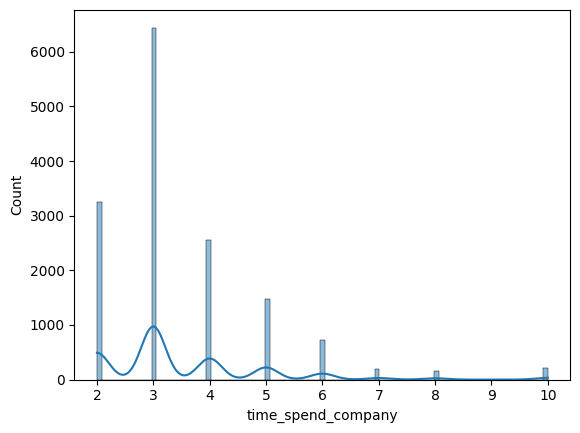

In [10]:
# Measure of Distribution
# Distribution of Time Spent in the Company
sns.histplot(df['time_spend_company'], kde=True)

print("\nMeasure of Distribution:")

In [11]:


# Measure of Relationship
# Correlation Between Variables
correlation_matrix = df.corr()
satisfaction_correlation = correlation_matrix['satisfaction_level'].sort_values(ascending=False)
print("\nMeasure of Relationship:")
print("Correlation Between Satisfaction Level and Other Variables:\n", correlation_matrix['satisfaction_level'].sort_values(ascending=False))



Measure of Relationship:
Correlation Between Satisfaction Level and Other Variables:
 satisfaction_level       1.000000
last_evaluation          0.105021
Work_accident            0.058697
Emp ID                   0.045841
promotion_last_5years    0.025605
average_montly_hours    -0.020048
time_spend_company      -0.100866
number_project          -0.142970
Name: satisfaction_level, dtype: float64


<ipython-input-11-57dc585192bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


* Positive Correlation:
There is a positive correlation (albeit weak) between satisfaction_level and last_evaluation (0.105021) and Work_accident (0.058697).
This suggests that employees who have higher satisfaction levels tend to have higher last evaluations and are less likely to have experienced work accidents.
* Negative Correlation:
There is a negative correlation between satisfaction_level and time_spend_company (-0.100866) and number_project (-0.142970).
The negative correlation with time_spend_company suggests that as the time spent in the company increases, employee satisfaction tends to decrease.
The negative correlation with number_project suggests that employees with a higher number of projects tend to have lower satisfaction levels.
* Weak Correlations:
The correlation with Emp ID (0.045841) and promotion_last_5years (0.025605) is weak, indicating a very minor relationship.
The correlation with average_montly_hours is close to zero (-0.020048), suggesting a weak or negligible relationship.

In [12]:
# ANOVA for Job Satisfaction and Department
anova_department = f_oneway(*[group['satisfaction_level'] for name, group in df.groupby('dept')])

# ANOVA for Job Satisfaction and Salary Level
anova_salary = f_oneway(*[group['satisfaction_level'] for name, group in df.groupby('salary')])

# Print the results
print("ANOVA for Job Satisfaction and Department:")
print("F-statistic:", anova_department.statistic)
print("p-value:", anova_department.pvalue)

print("\nANOVA for Job Satisfaction and Salary Level:")
print("F-statistic:", anova_salary.statistic)
print("p-value:", anova_salary.pvalue)

ANOVA for Job Satisfaction and Department:
F-statistic: 2.1584321691809847
p-value: 0.021865375192711502

ANOVA for Job Satisfaction and Salary Level:
F-statistic: 18.96089574199883
p-value: 5.967355425747657e-09


* ANOVA for Job Satisfaction and Department:
F-statistic: 2.16
p-value: 0.0219
Conclusion: The p-value is less than the significance level of 0.05. Therefore, we reject the null hypothesis. This suggests that there are significant differences in satisfaction levels among different departments.
* ANOVA for Job Satisfaction and Salary Level:
F-statistic: 18.96
p-value: 5.97e-09
Conclusion: The p-value is significantly less than the significance level of 0.05. Hence, we reject the null hypothesis. This indicates that there are significant differences in satisfaction levels based on salary levels.

For the department, there is evidence to suggest that job satisfaction varies significantly between different departments.
For the salary level, there is strong evidence to suggest that job satisfaction varies significantly among different salary levels.

## EDA

### Univariate Plots

Histogram of Satisfaction Level

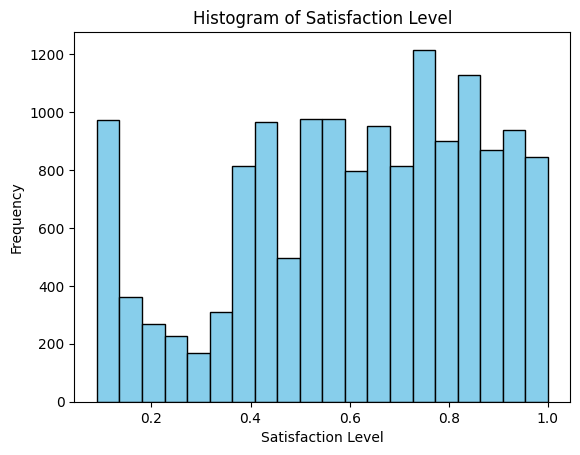

In [13]:
plt.hist(df['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

 Bar Plot of Department Counts:

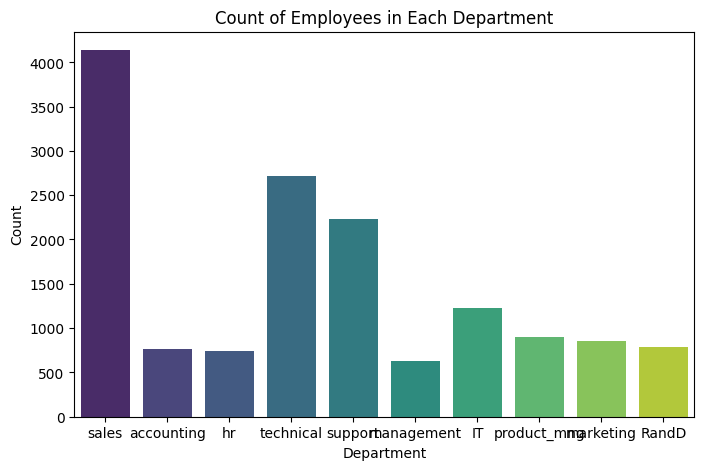

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='dept', data=df, palette='viridis')
plt.title('Count of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


Bar Plot of Salary Level Counts

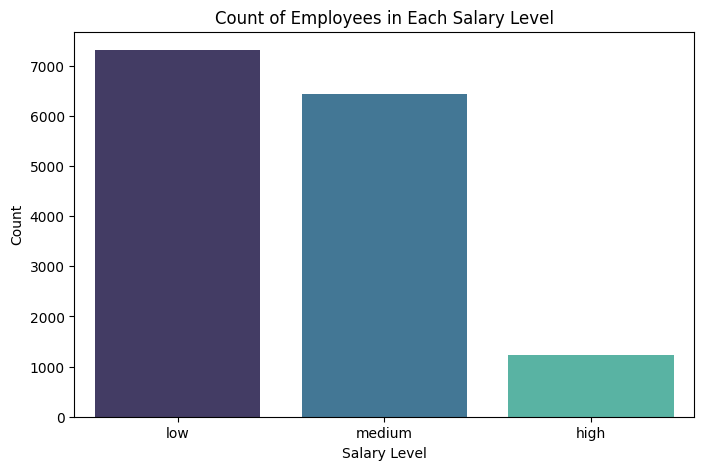

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='salary', data=df, palette='mako')
plt.title('Count of Employees in Each Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()


### Multivariate Plots:

Pair Plot for Selected Numerical Columns

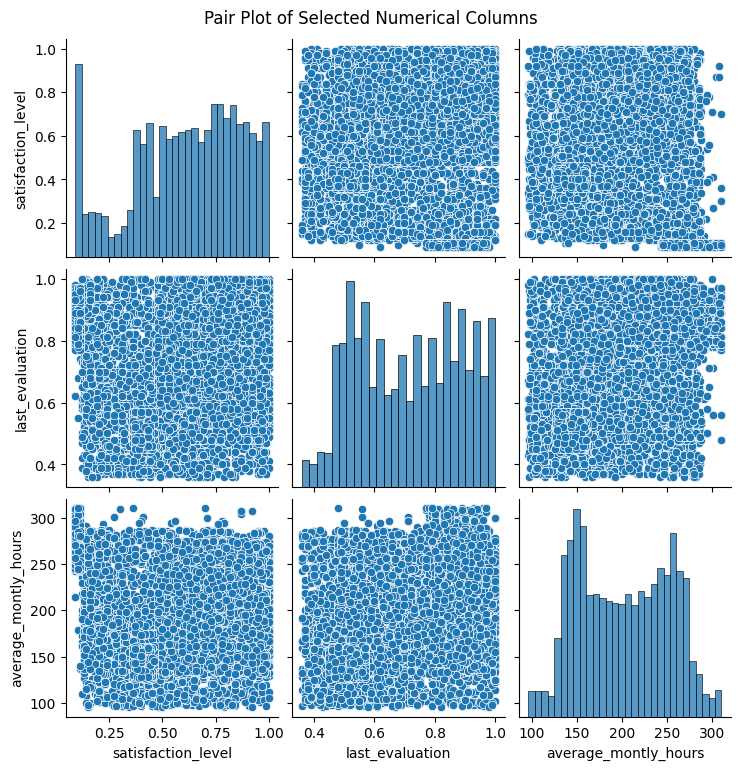

In [16]:
selected_columns = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Numerical Columns', y=1.02)
plt.show()


Heatmap of Correlation Matrix

<ipython-input-17-b91244024994>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


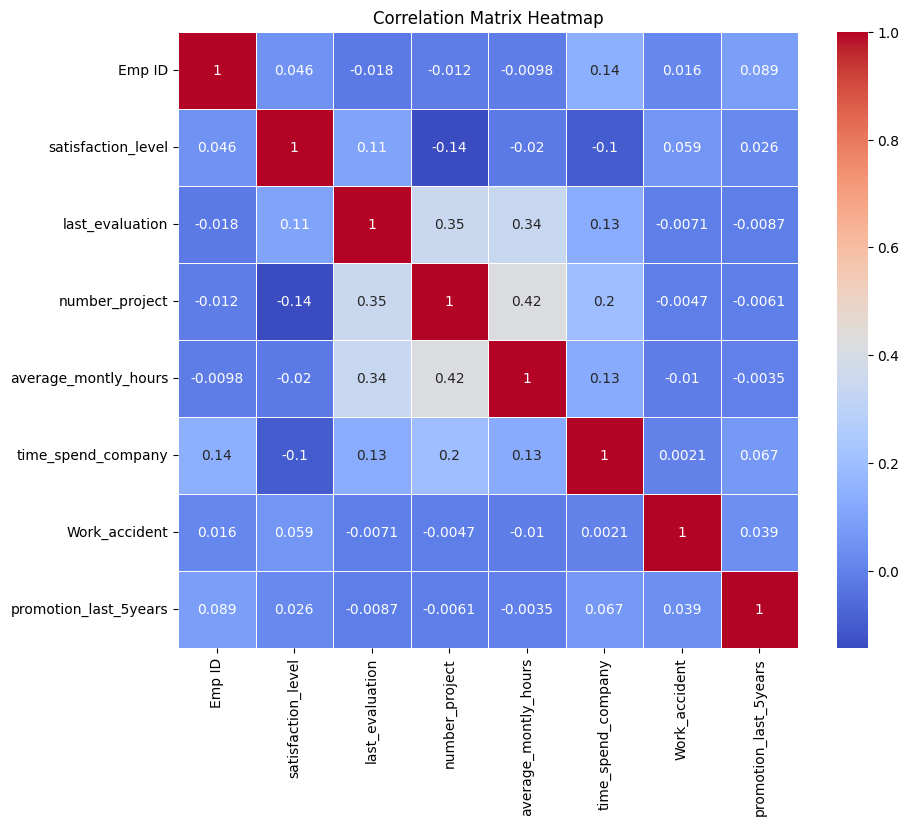

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


To show the relationship between 'satisfaction_level' and 'dept' (department).

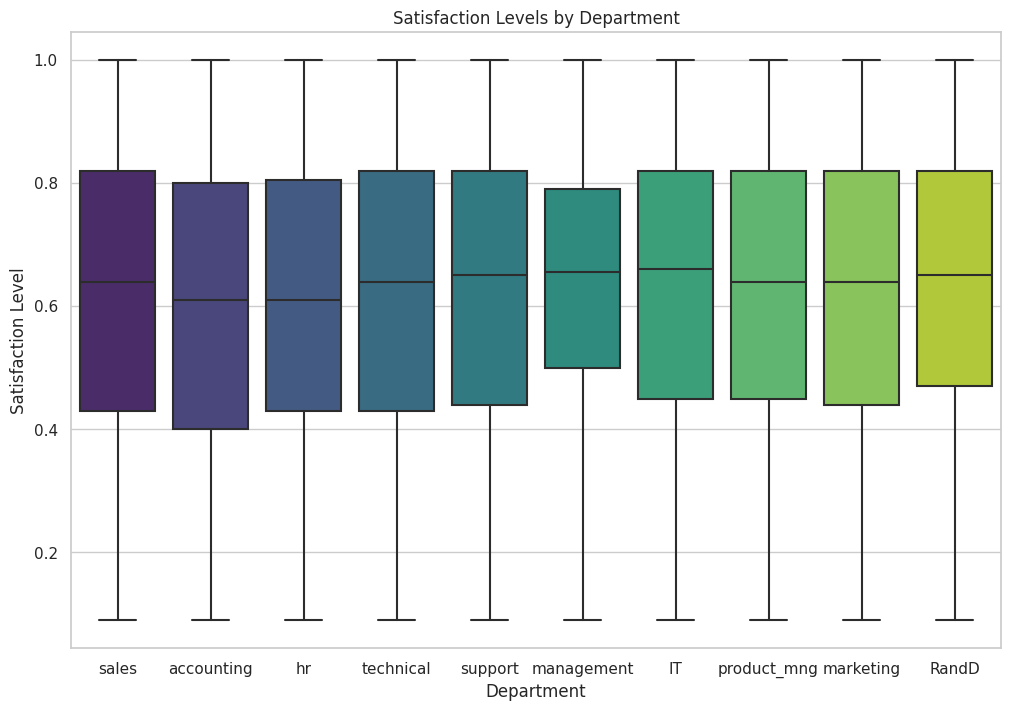

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='dept', y='satisfaction_level', data=df, palette='viridis')
plt.title('Satisfaction Levels by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.show()

## Preprocessing and Data Transformation

In [19]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64


In [20]:
df.promotion_last_5years

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15782    0.0
15783    0.0
15784    0.0
15785    0.0
15786    0.0
Name: promotion_last_5years, Length: 15787, dtype: float64

In [21]:
# Imputation of missing values using mean for numerical columns
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Imputation of missing values using mode for categorical columns
categorical_columns = ['dept', 'salary']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check again after imputation
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Emp ID                   788
satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident            788
promotion_last_5years    788
dept                       0
salary                     0
dtype: int64


In [22]:
df.Work_accident


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15782    0.0
15783    0.0
15784    0.0
15785    0.0
15786    0.0
Name: Work_accident, Length: 15787, dtype: float64

i want to get to know the important features so that we drop columns we don't need.

To achieve this we are going to get the feature importance using a decision tree

In [23]:
# lets carry out encoding
from sklearn.preprocessing import LabelEncoder

# # #lets drop EMP ID column
df.pop("Emp ID")

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
          ...   
15782    14995.0
15783    14996.0
15784    14997.0
15785    14998.0
15786    14999.0
Name: Emp ID, Length: 15787, dtype: float64

In [24]:
dict_label = dict()
for col in df.columns:
    if df[col].dtype == np.dtype("object"):
        dict_label[col] = LabelEncoder()
        df[col] = dict_label[col].fit_transform(df[col])
    else:
        # lets impute the numerica values using the mean
        df[col] = df[col].fillna(df[col].mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15787 non-null  float64
 1   last_evaluation        15787 non-null  float64
 2   number_project         15787 non-null  float64
 3   average_montly_hours   15787 non-null  float64
 4   time_spend_company     15787 non-null  float64
 5   Work_accident          15787 non-null  float64
 6   promotion_last_5years  15787 non-null  float64
 7   dept                   15787 non-null  int64  
 8   salary                 15787 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.1 MB


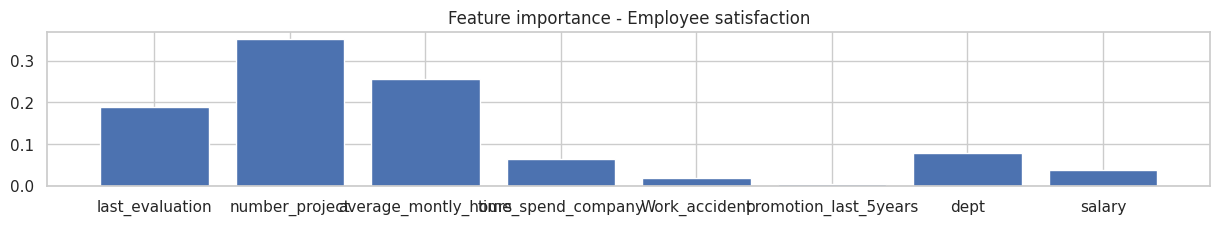

{'last_evaluation': 0.1878527276100741, 'number_project': 0.352206139408279, 'average_montly_hours': 0.25536204235434184, 'time_spend_company': 0.06438148159457752, 'Work_accident': 0.018126162930983673, 'promotion_last_5years': 0.004830391530257125, 'dept': 0.07891568040165427, 'salary': 0.03832537416983254}


In [26]:
# Assign y directly as 'satisfaction_level' without popping
y = df['satisfaction_level']

# Assign x as the remaining columns
x = df.drop(columns=['satisfaction_level'])

# Create and fit the decision tree model
dtr = DecisionTreeRegressor()
dtr.fit(x, y)

# Get feature importances
importance = {str(col): feat_imp for col, feat_imp in zip(x.columns, dtr.feature_importances_)}

# Plot feature importances
plt.rcParams["font.size"] = 8
plt.rcParams['figure.figsize'] = [15, 2]
plt.bar(list(importance.keys()),list(importance.values()))
plt.title("Feature importance - Employee satisfaction")
plt.show()

# Print feature importances
print(importance)

In [27]:
satisfaction_range = df['satisfaction_level'].min(), df['satisfaction_level'].max()
print("Range of Satisfaction Level:", satisfaction_range)

Range of Satisfaction Level: (0.09, 1.0)


In [28]:
last_evaluation = df['last_evaluation'].min(), df['last_evaluation'].max()
print("Range of last_evaluation Level:", last_evaluation)

Range of last_evaluation Level: (0.36, 1.0)


In [29]:
# since last_evalution is essentially the last score an employee was given
#Lets rename it so that its not confusing and its sensible

# Renaming the columns
df = df.rename(columns={'last_evaluation': 'performance_evaluation'})

# Check the resulting DataFrame
print(df.head())


   satisfaction_level  performance_evaluation  number_project  \
0                0.38                    0.53             2.0   
1                0.80                    0.86             5.0   
2                0.11                    0.88             7.0   
3                0.72                    0.87             5.0   
4                0.37                    0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years  dept  salary  
0                    0.0     7       1  
1                    0.0     7       2  
2                    0.0     7       2  
3                    0.0     7       1  
4                    0.0     7 

In [30]:
# Drop less important columns
selected_columns = ['number_project', 'average_montly_hours', 'performance_evaluation', 'dept', 'time_spend_company', 'salary']
df_selected = df[selected_columns]

# Check the resulting DataFrame
print(df_selected.head())

   number_project  average_montly_hours  performance_evaluation  dept  \
0             2.0                 157.0                    0.53     7   
1             5.0                 262.0                    0.86     7   
2             7.0                 272.0                    0.88     7   
3             5.0                 223.0                    0.87     7   
4             2.0                 159.0                    0.52     7   

   time_spend_company  salary  
0                 3.0       1  
1                 6.0       2  
2                 4.0       2  
3                 5.0       1  
4                 3.0       1  


In [31]:
# Include 'satisfaction_level' as the target variable
df_selected = df[selected_columns].copy()
df_selected['satisfaction_level'] = df['satisfaction_level']

# Check the resulting DataFrame
print(df_selected.head())



   number_project  average_montly_hours  performance_evaluation  dept  \
0             2.0                 157.0                    0.53     7   
1             5.0                 262.0                    0.86     7   
2             7.0                 272.0                    0.88     7   
3             5.0                 223.0                    0.87     7   
4             2.0                 159.0                    0.52     7   

   time_spend_company  salary  satisfaction_level  
0                 3.0       1                0.38  
1                 6.0       2                0.80  
2                 4.0       2                0.11  
3                 5.0       1                0.72  
4                 3.0       1                0.37  


## Training

In [32]:
# Split the data into features (X) and target variable (y)
X = df_selected.drop(columns=['satisfaction_level'])
y = df_selected['satisfaction_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.051931016326739014
R-squared: 0.0472578264441873


* Mean Squared Error (MSE): This is a measure of the average squared difference between predicted values and actual values. A lower MSE indicates better model performance.An MSE of 0.0519 suggests that, on average, the predicted satisfaction levels are close to the actual satisfaction levels.

* R-squared (R2): This is a measure of how well the model explains the variance in the target variable. R2 ranges from 0 to 1, with higher values indicating a better fit.
An R2 of 0.0473 suggests that the model explains about 4.73% of the variance in the satisfaction levels. While positive, this indicates that there is room for improvement, and the model may not be capturing all the complexities in the data.

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 0.0270400416748619
Random Forest - R-squared: 0.5039151955691099


* Random Forest Mean Squared Error (MSE): The MSE of 0.027 is lower than the MSE obtained with linear regression. This suggests that, on average, the Random Forest model's predictions are closer to the actual satisfaction levels.
* Random Forest R-squared (R2): The R2 value of 0.504 indicates that the Random Forest model explains approximately 50.4% of the variance in the satisfaction levels. This is a significant improvement over the linear regression model, suggesting that the Random Forest model captures more of the complexity in the data.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics for Gradient Boosting
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)

Gradient Boosting - Mean Squared Error: 0.03056158655069482
Gradient Boosting - R-squared: 0.4393078653723417


* Gradient Boosting Mean Squared Error (MSE): The MSE of 0.0306 is an indicator of the average squared difference between the predicted satisfaction levels and the actual satisfaction levels on the testing data. Lower MSE values are desirable, and this suggests that, on average, the predictions are relatively close to the true values.
* Gradient Boosting R-squared (R2): The R2 value of 0.4393 indicates the proportion of variance in the satisfaction levels that the model explains. While this value is lower than what we achieved with the Random Forest model, it still suggests that the Gradient Boosting model captures a substantial portion of the variance in the data.

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Create a Support Vector Regressor model
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics for Support Vector Regressor
print("Support Vector Regressor - Mean Squared Error:", mse_svr)
print("Support Vector Regressor - R-squared:", r2_svr)

Support Vector Regressor - Mean Squared Error: 0.0452484043163236
Support Vector Regressor - R-squared: 0.169859052882252


* SVR Mean Squared Error (MSE): The MSE of 0.0452 is an indicator of the average squared difference between the predicted satisfaction levels and the actual satisfaction levels on the testing data. While lower MSE values are desirable, it's important to compare this result with the other models you've tried.
* SVR R-squared (R2): The R2 value of 0.1699 indicates the proportion of variance in the satisfaction levels that the SVR model explains. This value is lower compared to the Random Forest and Gradient Boosting models, suggesting that the SVR model might not capture as much of the variance in the data.

Based on the results we can work with Random Forest and  Gradient Boosting models as this should good potentails more than the others based on the evaluation matrix we used

### Random Forest Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search_rf.fit(X, y)

# Get the best parameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)

In [38]:
# Create the final Random Forest model with best parameters
final_rf_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)

# Fit the model on the training data
final_rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf_final = final_rf_model.predict(X_test)

# Evaluate the final model
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
r2_rf_final = r2_score(y_test, y_pred_rf_final)

# Print evaluation metrics for the final Random Forest model
print("Final Random Forest - Mean Squared Error:", mse_rf_final)
print("Final Random Forest - R-squared:", r2_rf_final)

Final Random Forest - Mean Squared Error: 0.026850743259866954
Final Random Forest - R-squared: 0.5073881216951501


* Final Random Forest Mean Squared Error (MSE): The MSE of 0.0268 is lower than the MSE obtained with the default Random Forest and other models. This indicates that, on average, the predictions are closer to the true satisfaction levels.
* Final Random Forest R-squared (R2): The R2 value of 0.5074 indicates that the final Random Forest model explains approximately 50.7% of the variance in the satisfaction levels. This is a good improvement over the default Random Forest.

In [39]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search_gb.fit(X, y)

# Get the best parameters and the best model
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Print the best parameters
print("Best Parameters for Gradient Boosting:", best_params_gb)

In [40]:
# Create the final Gradient Boosting model with best parameters
final_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=150, random_state=42)

# Fit the model on the training data
final_gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb_final = final_gb_model.predict(X_test)

# Evaluate the final model
mse_gb_final = mean_squared_error(y_test, y_pred_gb_final)
r2_gb_final = r2_score(y_test, y_pred_gb_final)

# Print evaluation metrics for the final Gradient Boosting model
print("Final Gradient Boosting - Mean Squared Error:", mse_gb_final)
print("Final Gradient Boosting - R-squared:", r2_gb_final)

Final Gradient Boosting - Mean Squared Error: 0.02852151867900887
Final Gradient Boosting - R-squared: 0.47673556919470406


In [41]:
# Make predictions on the testing data using both models
y_pred_rf = final_rf_model.predict(X_test)
y_pred_gb = final_gb_model.predict(X_test)

# Ensemble by averaging predictions
y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Print evaluation metrics for the ensemble model
print("Ensemble - Mean Squared Error:", mse_ensemble)
print("Ensemble - R-squared:", r2_ensemble)

Ensemble - Mean Squared Error: 0.02668223793179897
Ensemble - R-squared: 0.5104795715429469


### Comparing the metrics:

The ensemble's MSE is slightly lower than both the Random Forest and Gradient Boosting individually.
The ensemble's R2 is higher than both the Random Forest and Gradient Boosting individually.
This suggests that the ensemble is providing a good balance and capturing aspects of both models that contribute to improved performance

## Testing

In [42]:
# Define columns and their possible values
columns = ['number_project', 'average_montly_hours', 'performance_evaluation', 'dept', 'time_spend_company', 'salary']
num_samples = 5  # Number of samples in the test dataset

# Generate random test data
test_data = {
    'number_project': np.random.randint(2, 8, num_samples),
    'average_montly_hours': np.random.randint(120, 300, num_samples),
    'performance_evaluation': np.random.uniform(0.4, 1.0, num_samples),
    'dept': np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], num_samples),
    'time_spend_company': np.random.randint(2, 10, num_samples),
    'salary': np.random.choice([1, 2, 3], num_samples)
}

# Create a DataFrame from the test data
test_df = pd.DataFrame(test_data)

# Print the generated test data
print("Generated Test Data:")
print(test_df)

Generated Test Data:
   number_project  average_montly_hours  performance_evaluation  dept  \
0               7                   183                0.851548     7   
1               6                   133                0.785994     9   
2               2                   141                0.569976     9   
3               7                   246                0.468930     3   
4               7                   156                0.533050     6   

   time_spend_company  salary  
0                   9       3  
1                   2       3  
2                   2       2  
3                   6       2  
4                   7       1  


In [43]:
# Make predictions on the test data using both models
y_pred_rf_test = final_rf_model.predict(test_df)
y_pred_gb_test = final_gb_model.predict(test_df)

# Ensemble by averaging predictions
y_pred_ensemble_test = (y_pred_rf_test + y_pred_gb_test) / 2

# Add the predictions to the test data
test_df['predicted_satisfaction_level'] = y_pred_ensemble_test

# Multiply predicted satisfaction levels by 100 to get percentages
test_df['satisfaction_level_percentage'] = test_df['predicted_satisfaction_level'] * 100
test_df['satisfaction_level_percentage'] = test_df['satisfaction_level_percentage'].round(2)


# Print the predictions as percentages
print("\nPredicted Satisfaction Levels (as Percentages):")
print(test_df[['satisfaction_level_percentage']],)


Predicted Satisfaction Levels (as Percentages):
   satisfaction_level_percentage
0                          44.32
1                          55.00
2                          55.67
3                          69.25
4                          19.38


### Saving the model as a pickle file

In [44]:
import joblib


# Save the models to files
joblib.dump(final_rf_model, 'final_rf_model.pkl')
joblib.dump(final_gb_model, 'final_gb_model.pkl')

# Create a dictionary to store the models for the ensemble
ensemble_model = {
    'random_forest': final_rf_model,
    'gradient_boosting': final_gb_model
}

# Save the ensemble model to a file
joblib.dump(ensemble_model, 'ensemble_model.pkl')

# Load the ensemble model later if needed
loaded_ensemble_model = joblib.load('ensemble_model.pkl')


## Testing the saved model

In [45]:
# Create a sample test dataset
test_data = {
    'number_project': [5, 3, 7],
    'average_montly_hours': [200, 150, 250],
    'performance_evaluation': [0.8, 0.6, 0.9],
    'dept': [2, 1, 3],
    'time_spend_company': [4, 2, 6],
    'salary': [2, 1, 3]
}

# Pass the test data through the loaded ensemble model
y_pred_rf_new = loaded_ensemble_model['random_forest'].predict(pd.DataFrame(test_data))
y_pred_gb_new = loaded_ensemble_model['gradient_boosting'].predict(pd.DataFrame(test_data))

# Ensemble by averaging predictions
y_pred_ensemble_new = (y_pred_rf_new + y_pred_gb_new) / 2

# Print the ensemble predictions
print("\nEnsemble Predictions:")
print(y_pred_ensemble_new * 100)


Ensemble Predictions:
[64.04140056 73.01597111 55.85955789]
